In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [70]:
# Loading Dataset

data = pd.read_csv("Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [71]:
# First 5 Rows of Dataset
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [72]:
# Last 5 Rows of Dataset
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [73]:
# Shape of Dataset
data.shape

(400, 9)

In [74]:
# Check what are the unecessary columns present in the dataset.
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [75]:
# Identified Unecessary Column :- Serial No.
# Now removing the Serial No. column from the dataset.
data.drop("Serial No.", axis = 1, inplace = True)
# Note: axis is kept 1, because we want to delete the whole column of the Serial No.


In [76]:
# Checking the Dataset
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [77]:
# Applying the necessary function on the "Chance of Admit" in order to encode the data from float values to the integer 0/1 Values.
data[data["Chance of Admit "]>= 0.7] = 1
data[data["Chance of Admit "]< 0.7] = 0

In [78]:
# Checking if the encoding is done properly
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1,1,1.0,1.0,1.0,1,1.0
1,1,1,1,1.0,1.0,1.0,1,1.0
2,1,1,1,1.0,1.0,1.0,1,1.0
3,1,1,1,1.0,1.0,1.0,1,1.0
4,0,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...
395,1,1,1,1.0,1.0,1.0,1,1.0
396,1,1,1,1.0,1.0,1.0,1,1.0
397,1,1,1,1.0,1.0,1.0,1,1.0
398,0,0,0,0.0,0.0,0.0,0,0.0


Data Checking

In [79]:
# Checking for missing values
print("Missing Values")
data.isnull().sum()

Missing Values


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [80]:
# data dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [81]:
# Calculating Total count of the Admitted and Non-Admitted Students.
admitted_students = data[data["Chance of Admit "] == 1]
non_admitted_students = data[data["Chance of Admit "] == 0]
print("Total Admitted Students: ", admitted_students.shape[0])
print("Total Non-Admitted Students: ", non_admitted_students.shape[0])

Total Admitted Students:  247
Total Non-Admitted Students:  153


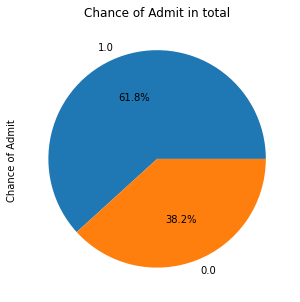

In [82]:
data['Chance of Admit '].value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.1f%%')
plt.title("Chance of Admit in total")
plt.show()

Splitting Data

In [83]:
# Declaring Independent and Dependent features

X = data.drop("Chance of Admit ", axis = 1)
Y = data["Chance of Admit "]

In [84]:

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 42)
# Shape of train test split
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(320, 7) (320,)
(80, 7) (80,)


In [85]:
# Model Training And Predicting
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [86]:
yTrainTree = tree.predict(xTrain)
yTestTree = tree.predict(xTest)

In [87]:
from sklearn.metrics import accuracy_score
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(yTrain,yTrainTree)
acc_test_tree = accuracy_score(yTest,yTestTree)


print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 1.000


In [88]:
from sklearn.metrics import classification_report
print(classification_report(yTest, yTestTree))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32
         1.0       1.00      1.00      1.00        48

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [89]:
# Decision Tree Implementation

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(xTrain, yTrain)

DecisionTreeClassifier()

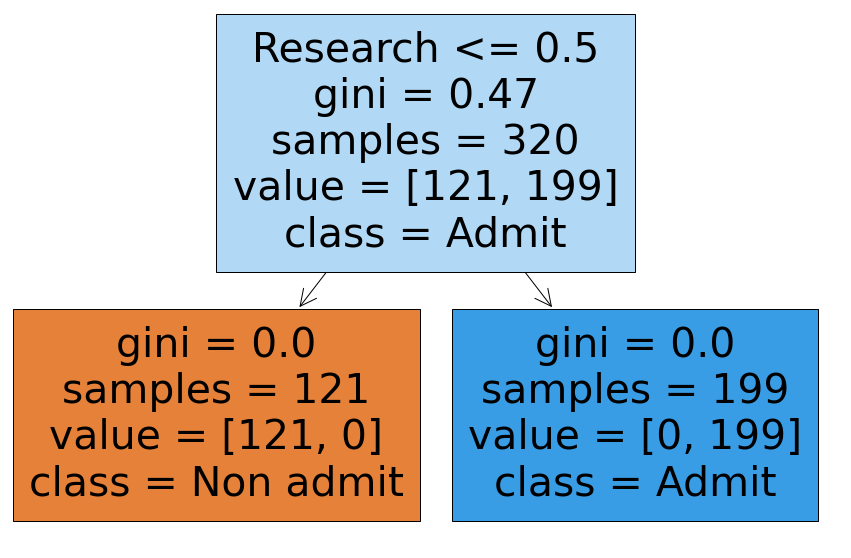

In [90]:
import sklearn.tree as tr
fig = plt.figure(figsize=(15,10))
_ = tr.plot_tree(tree, 
                 feature_names=X.columns,  
                 class_names=np.array(["Non admit","Admit"]),
                 filled=True)
